# Integral de camino para la descripción del estado base de un átomo muonico

Diego Armando Salazar

Santiago Quintero

# **Librerias**

In [1]:
import random
import numpy as np
import matplotlib.pyplot as plt

# Clase que se encarga de realizar la integral de camino

In [2]:
class PathIntegral:
    def __init__(self, num_stepx, num_stept, t, xi, xf, Pot, masa):#inicializacion de la clase
        self.M = num_stepx#pasos en x
        self.N = num_stept#pasos en t
        self.time = t#tiempo
        self.a = xi#punto inicial
        self.b = xf#punto final
        self.dx = (xf - xi) / num_stepx#diferencial de distancia
        self.dt = t / num_stept#diferencial de tiempo
        self.set_x()#inicializacion de la malla
        self.mass = masa
        self.Vx = Pot#potencial

    def set_x(self):
        self.x = np.linspace(self.a, self.b, self.M)#creacion de la malla

    def get_x(self):
        return self.x

    def pbc(self, k):#condicion de frontera
        if k == self.M:#Al llegar al ultimo elemento tomar el primero
            return 0
        elif k < 0:#al llegar al primer elemento tomar el ultima
            return self.M - 1
        else:#no se afectan los elementos del medio
            return k

    def camino(self, step):#integral de camino
        path = np.zeros(self.M)#se crean el arreglo espacial de M ceros
        prob = np.zeros(self.M)#se crean el arreglo con la amplitud con N ceros(NO NORMALIZADO)

        for _ in range(step):
            k = 1 + random.randint(0, self.M - 2)#Se toma un numero aleatorio k entre 1 y M-1
            change = 2 * self.dx * (random.random() - 0.5)#se toma un valor entre -dx y dx
            Delta_E = hbar*self.mass *(change ** 2 + 2 * change * path[self.pbc(k)] - change * (path[self.pbc(k+1)] + path[self.pbc(k-1)])) / self.dt + (self.Vx(path[k] + change) - self.Vx(path[k])) * self.dt/hbar
#Se calcula la diferncia de energia de una particula en una posicion x y una en una posicion x+change

##############Aceptacion del estado en el algoritmo de metroolis#################################################
            if Delta_E <= 0:
                path[k] += change
            elif np.exp(-Delta_E) >= random.random():
                path[k] += change
#############################################################################
            for l in range(len(self.x) - 1):#Conteo de los estados
                if self.x[l] < path[k] and path[k] < self.x[l + 1]:
                    prob[l] += 1

        return prob

#Atomo muonico

In [3]:
#Valores del atomo
m= 1.88* 10**(-28)
omega = 1.3 * (10 ** 22)  # rad/s
v_c = 3 * (10 ** 8)
hbar = 1.0545718*10**(-34)
t = 2 * np.pi * 20 / omega
x = 8.5 * (10 ** -15)
#Valores de la simulacion
N = 300
M = 301
step = 1000000

def Harmonic(r):#potencial de oscilador armonico
    return 0.5 *m*(omega*r)**2

In [4]:
Oscilador = PathIntegral(M, N, t, -x, x, Harmonic,m)
psi = Oscilador.camino(step)#Se guarda en una variable la funcion de onda
pos_x = Oscilador.get_x()#se guarda en una variable la posicion del muon

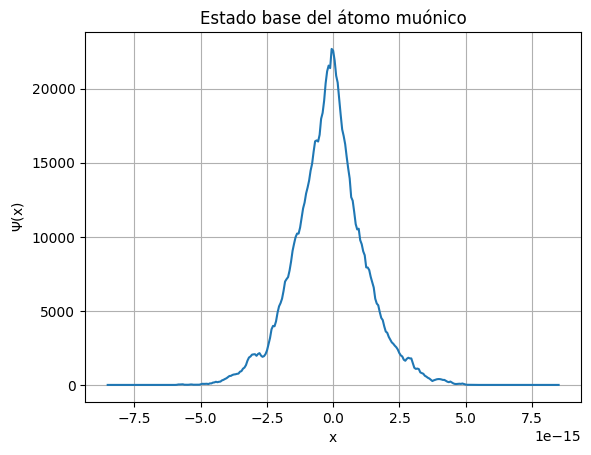

In [5]:
plt.plot(pos_x,psi)
plt.title("Estado base del átomo muónico")
plt.xlabel("x")
plt.ylabel("$\Psi$(x)")
plt.grid()
plt.savefig("Base.png")
plt.show()